#### About Dataset
###### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

##### Content
###### Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
data = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\heart.csv')

In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* Shape

In [23]:
data.shape

(1025, 14)

In [24]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


* Missing values

In [26]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values

In [27]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


* Standardization

In [28]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
#transforming the column
data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']] = scaler.fit_transform(data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])

In [30]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0


######  Handling Imbalance data

In [33]:
target_count = data['target'].value_counts()
target_count

target
1    526
0    499
Name: count, dtype: int64

* The data is not balance

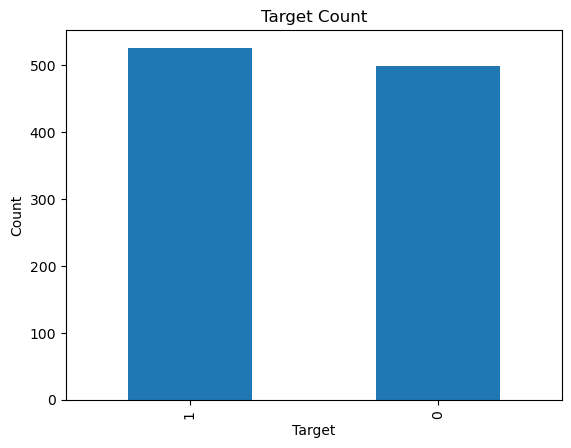

In [34]:
target_count.plot(kind='bar')
plt.title('Target Count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

###### Using Oversampling

In [35]:
x = data.drop(['target'],axis=1)
y = data['target']

In [36]:
x.shape

(1025, 13)

In [37]:
y.shape

(1025,)

In [38]:
from imblearn.over_sampling import SMOTE


In [39]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [40]:
x_res.shape

(1052, 13)

In [41]:
y_res.shape

(1052,)

In [42]:
y_res.value_counts()

target
0    526
1    526
Name: count, dtype: int64

Imbalcance resolved

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.20,random_state=42)

######  Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

###### Scoring the model

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [46]:
y_pred1 = log.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred1)

0.8388625592417062

In [49]:
precision_score(y_test,y_pred1)

0.832

In [50]:
recall_score(y_test,y_pred1)

0.8888888888888888

In [51]:
f1_score(y_test,y_pred1)

0.859504132231405

######  Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred2 = dt.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred2)

1.0

In [55]:
precision_score(y_test,y_pred2)

1.0

In [56]:
recall_score(y_test,y_pred2)

1.0

In [57]:
f1_score(y_test,y_pred2)

1.0

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
y_pred3 = rf.predict(x_test)

In [60]:
accuracy_score(y_test,y_pred3)

1.0

In [61]:
precision_score(y_test,y_pred3)

1.0

In [63]:
f1_score(y_test, y_pred3)

1.0

In [64]:
recall_score(y_test,y_pred3)

1.0

######  Visualization

In [65]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
             "ACC":[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                    accuracy_score(y_test,y_pred3)*100,
                   ]})

In [66]:
final_data

,Models,ACC
0,LR,83.886256
1,DT,100.000000
2,RF,100.000000


In [67]:
final_data_prec = pd.DataFrame({'Models':['LR','DT','RF'],
             "PRE":[precision_score(y_test,y_pred1)*100,
                    precision_score(y_test,y_pred2)*100,
                    precision_score(y_test,y_pred3)*100,
                   ]})

In [68]:
final_data_prec

,Models,PRE
0,LR,83.2
1,DT,100.0
2,RF,100.0


In [69]:
final_data_re = pd.DataFrame({'Models':['LR','DT','RF'],
             "Recall":[recall_score(y_test,y_pred1)*100,
                    recall_score(y_test,y_pred2)*100,
                    recall_score(y_test,y_pred3)*100,
                   ]})

In [70]:
final_data_re

,Models,Recall
0,LR,88.888889
1,DT,100.000000
2,RF,100.000000


In [71]:
final_data_F1 = pd.DataFrame({'Models':['LR','DT','RF'],
             "F1":[f1_score(y_test,y_pred1)*100,
                    f1_score(y_test,y_pred2)*100,
                    f1_score(y_test,y_pred3)*100,
                   ]})

In [72]:
final_data_F1

,Models,F1
0,LR,85.950413
1,DT,100.000000
2,RF,100.000000


* From the above, both the decisionTreeClassifier and the RandomForestClassifier the best.
But in this project,i wll use the DecisionTreeClassifier model, this is because i am using a smaller dataset.

######  Using DecisionTreeClassifier Model

In [74]:
#train the model in the whole dataset
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

###### Save The Model 

In [75]:
#Import library
import joblib

In [76]:
#save the model
joblib.dump(DT,'Heart Disease detector')

['Heart Disease detector']

In [77]:
model = joblib.load('Heart Disease detector')

In [78]:
prediction = model.predict([[1,0,1,1,1,1,0,0,1,1,1,1,1]])

In [79]:
if prediction==0:
    print("No Disease")
else:
        print("Disease")

No Disease


In [81]:
from tkinter import *
import joblib


def show_entry_fields():
    age=float(e1.get())
    sex=float(e2.get())
    cp=float(e3.get())
    trestbps=float(e4.get())
    chol=float(e5.get())
    fbs=float(e6.get())
    
    restecg=float(e7.get())
    thalach=float(e8.get())
    exang=float(e9.get())
    oldpeak=float(e10.get())
    slope=float(e11.get())
    ca=float(e12.get())
    thal=float(e13.get())

    
    model = joblib.load('Heart Disease detector')
    y_pred = model.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
    
    list1  = [age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]
    
    result = []
    if y_pred ==0:
        result.append("No Disease")
    else:
        result.append("Disease")
    print("") 
    print("Heart Disease Detection System",result)
    print("")
    
    Label(master,text="Final Prediction From The Model-Heart Disease Detection System")
    Label(master,text=result).grid(row=15)
    
master = Tk()
master.title("Heart Disease Detection System")

label = Label(master,text='Heart Disease Detection System'
             , bg = 'black',fg='white', width = 30).grid(row=15)

Label(master,text='Enter value of age').grid(row=1)
Label(master,text='Enter value of sex').grid(row=2)
Label(master,text='Enter value of cp').grid(row=3)
Label(master,text='Enter value of trestbps').grid(row=4)
Label(master,text='Enter value of chol').grid(row=5)
Label(master,text='Enter value of fbs').grid(row=6)

Label(master,text='Enter value of restecg').grid(row=7)
Label(master,text='Enter value of thalach').grid(row=8)
Label(master,text='Enter value of exang').grid(row=9)
Label(master,text='Enter value of oldpeak').grid(row=10)
Label(master,text='Enter value of slope').grid(row=11)
Label(master,text='Enter value of ca').grid(row=12)
Label(master,text='Enter value of thal').grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row = 1,column = 1)
e2.grid(row = 2,column = 1)
e3.grid(row = 3,column = 1)
e4.grid(row = 4,column = 1)
e5.grid(row = 5,column = 1)
e6.grid(row = 6,column = 1)

e7.grid(row = 7,column = 1)
e8.grid(row = 8,column = 1)
e9.grid(row = 9,column = 1)
e10.grid(row = 10,column = 1)
e11.grid(row = 11,column = 1)
e12.grid(row = 12,column = 1)
e13.grid(row = 13,column = 1)

Button(master,text = "Predict",command = show_entry_fields).grid()

mainloop()



Heart Disease Detection System ['Disease']


Heart Disease Detection System ['No Disease']

